In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
#i case==2 dname=data_C.... implement on our own if we want

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

print(v.shape)

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...
(10000, 20)


## initialize

In [3]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 4
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.35715520e-02  1.95527799e-01 -2.12059967e-01 -2.26875947e-01]
 [ 8.02526558e-01  5.68855549e-01  3.79294819e-02  1.15022385e-01]
 [ 3.13952149e-01  5.08854850e-01  4.11183333e-01 -5.29180052e-01]
 [ 1.12264864e-01  9.34532915e-02  5.52325985e-01  3.61883263e-01]
 [-8.17165010e-01 -1.51804080e-01  6.81376729e-01 -1.79045345e-01]
 [-2.20348522e-01  1.94728315e-01  1.32637580e+00 -4.16914391e-01]
 [-2.35594905e-01  5.06722986e-02  1.23541469e-01  2.13829051e-01]
 [ 3.83866794e-04  5.48608051e-01 -2.91303112e-01 -3.39317011e-01]
 [-9.67643021e-01 -7.59652411e-01 -3.51402736e-01  2.28678358e-01]
 [-5.16815592e-01  4.89192188e-02 -4.34177139e-01  1.35898800e-01]
 [-9.63228695e-01 -8.14630704e-02 -6.29517038e-01 -3.96301277e-01]
 [-5.33592866e-01  1.16901795e-01  1.54311367e-01 -3.07772889e-01]
 [ 1.35246800e-01  5.51029952e-01  2.85270388e-02  1.00704284e-01]
 [-4.84247836e-03  4.10212614e-01  5.41824932e-01 -3.75286959e-01]
 [-6.32420055e-01  9.05682448e-03  3.09600458e-01 -2.696579

## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1]


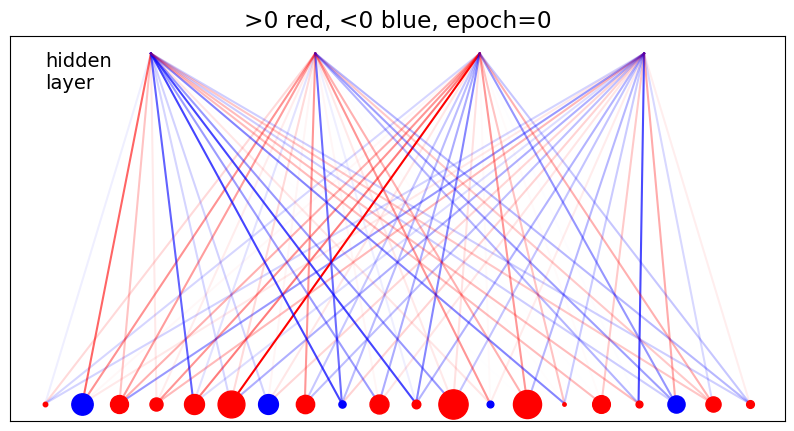

In [4]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [5]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

## Point 4:

If we simply use the activate function for the backward step of the contrastive divergence, we would generate vectors with 0s and 1s (activating a 1 for each component of the new vector, if a random generated number is under the probability calculated above). If we do so, however, for each 4 blocks of the vector there are $2^4$ possible states, while fot the way in which our data is structured (one-hot encoding) the ''real'' possible states are only 4: 0001,0010,0100,1000.    

Here is what I did:
- I defined a vector that contains all possible states, $s$
- for each entry of our data (a row with 20 elements) I divide it in blocks of 4;
- I compared each block of 4 with each state of s, to recognize to which state it corresponds;
- I compute the energy of the state as  $$E_{state}= \sum_{k \in block}[a_{k}+ \sum_{\nu}W_{k \nu}h_{\nu}]v_{k}$$
  where $v_{k}$ is (each time) the sub-vector of our real vector v constituded by 4 elements;

- I computed the Boltzmann's weights for each of the 4 states as $exp^{-E_{state}}$
- I calculated the normalized probability $p$.

Then, in order to have 4 intervals between 0 and 1, I calculated the cumulative probability for each state: $${C_{prob}}_i=\sum_{j\leq i}p_j$$.    
    
At this point, I have 4 levels that divide the gap 0-1 into 4 intervals. I generate a random number between 0 and 1 and, depending on which interval it belongs, I then generate the corresponding state of s.    
In this way, I generate 4 blocks at a time of the new "fantasy" vector (so I do it $5$ times), preserving the one-hot encoding structure.

In [7]:
s = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
vtest = np.array([1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0])
print(vtest)
htest = np.array([0,1,0,1])  


def activate_back(v,h,w,a,k,steps):
    
    e = np.zeros(4)
    
    for i in range(0,20,4):
        for j in range(len(s)):
            if np.array_equiv(v[i:i+4],s[j])==True:
                local_f = a[i:i+4]+np.dot(w[i:i+4,:],h)
                e[j]+= np.dot(local_f,v[i:i+4])
    b = exp(-e)
    p = b/b.sum()
   
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i]+=cprob[i-1]+p[i]
        
    vf = np.zeros(20)
    for i in range(0,20,4):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]
            
    for i in range(0,2):
        if k == 500*i and steps==1:
            print('----initiating backward CD: k = ',k,'----')
            print('WEIGHTS[0] : ', w.T[0])
            print('EVALUATED ENERGIES = ',e, '\n') 
            print('PROBABILITY : ', p, '\n')                       #it starts to behave strangely after 4,5 epochs
            print('CUMULATIVE PROBABILITY : ', cprob, '\n\n')
            
    return(vf,cprob)

vf, cprob = activate_back(vtest,htest,w,a,1,1)
print(vf)
print(cprob)

[1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
[0.15450857 0.45948559 0.73938469 1.        ]


# Training with ADAM and more steps of CD

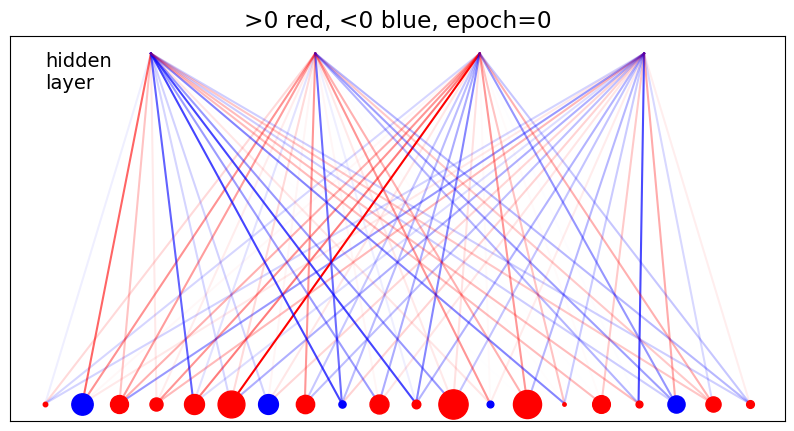

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-8.35715520e-02  8.02526558e-01  3.13952149e-01  1.12264864e-01
 -8.17165010e-01 -2.20348522e-01 -2.35594905e-01  3.83866794e-04
 -9.67643021e-01 -5.16815592e-01 -9.63228695e-01 -5.33592866e-01
  1.35246800e-01 -4.84247836e-03 -6.32420055e-01  3.52146844e-01
  3.48221516e-01 -2.66369289e-01  2.95425407e-01 -2.54042389e-01]
EVALUATED ENERGIES =  [ 0.         -0.4817971   0.44271906  0.23358629] 

PROBABILITY :  [0.24673336 0.39945669 0.15847379 0.19533616] 

CUMULATIVE PROBABILITY :  [0.24673336 0.64619006 0.80466384 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.08157155  0.80052656  0.31195215  0.11426486 -0.81516501 -0.21834852
 -0.2335949  -0.00161613 -0.96764302 -0.51881559 -0.96122869 -0.53559287
  0.1372468  -0.00284248 -0.63442006  0.35014684  0.35022152 -0.26836929
  0.29742541 -0.25604239]
EVALUATED ENERGIES =  [0.72534637 0.09501094 0.         1.08361616] 

PROBABILITY :  [0.17722417 0.3328696 

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.00820056  0.71461204  0.32877797  0.03482581 -0.76104119 -0.32069095
 -0.17766505 -0.06656468 -0.93172051 -0.6242005  -0.88369248 -0.59291759
  0.28123043  0.133736   -0.75606     0.15465138  0.31794339 -0.29514661
  0.29871968 -0.29580361]
EVALUATED ENERGIES =  [ 0.21567823 -0.03495465 -0.60045559  0.08817636] 

PROBABILITY :  [0.1759769  0.22610187 0.39801376 0.19990747] 

CUMULATIVE PROBABILITY :  [0.1759769  0.40207877 0.80009253 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.00897603  0.71421785  0.3275818   0.03457569 -0.76154706 -0.32169573
 -0.17820529 -0.06689934 -0.93287873 -0.62456571 -0.88399539 -0.59352597
  0.2812231   0.13478917 -0.75743336  0.15319589  0.31662297 -0.29582826
  0.29857755 -0.29630163]
EVALUATED ENERGIES =  [0.76500529 0.67754106 1.29642698 0.        ] 

PROBABILITY :  [0.20711748 0.22604869 0.12173718 0.44509665] 

CUMULATIVE PROBABILITY :  [0.20711748 0.43316616 0.5549

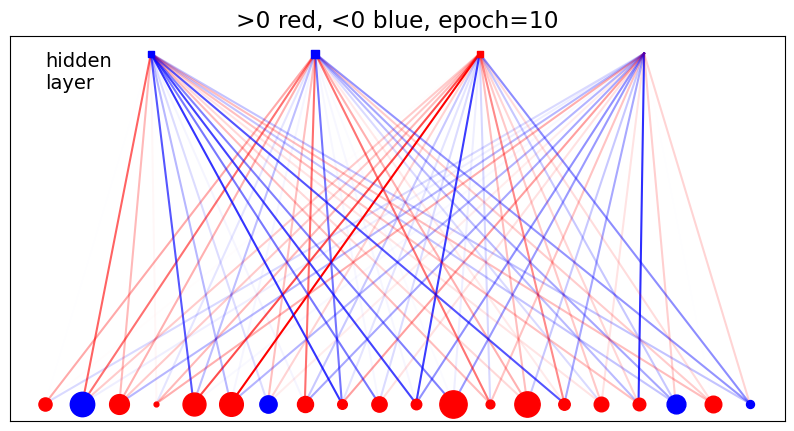

l_rate =  0.9090909090909092
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.00434977  0.72281416  0.32356637  0.0376434  -0.78154234 -0.33204307
 -0.15991057 -0.04558463 -0.93813436 -0.62536335 -0.8680035  -0.58891597
  0.3108266   0.18164138 -0.7928873   0.12409619  0.29108958 -0.27790141
  0.30584958 -0.27801759]
EVALUATED ENERGIES =  [ 0.         -0.53767814  2.12708767  0.        ] 

PROBABILITY :  [0.26101407 0.44686318 0.03110867 0.26101407] 

CUMULATIVE PROBABILITY :  [0.26101407 0.70787725 0.73898593 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.00429677  0.72349862  0.32353676  0.03772125 -0.78166349 -0.3330997
 -0.15857933 -0.04492729 -0.93800858 -0.62539529 -0.8678701  -0.58831233
  0.31163218  0.18243862 -0.79371786  0.12388401  0.2908831  -0.27765925
  0.30638463 -0.2776596 ]
EVALUATED ENERGIES =  [ 0.47930902 -0.10695785 -0.99855929 -0.02809418] 

PROBABILITY :  [0.11309876 0.2032686  0.49577873 0.18785391] 

CUMULATIVE PROBABILITY 

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.05230395  0.79603625  0.23193157  0.02953922 -0.88204174 -0.50474625
 -0.03324397  0.11200875 -0.96574254 -0.64188675 -0.84270353 -0.53678749
  0.4399201   0.38017635 -0.94883948 -0.03311528  0.21560556 -0.16890294
  0.27142377 -0.21947897]
EVALUATED ENERGIES =  [-1.11677889  0.08281614  1.23762027  1.06126736] 

PROBABILITY :  [0.66245814 0.19960938 0.06290076 0.07503173] 

CUMULATIVE PROBABILITY :  [0.66245814 0.86206751 0.92496827 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.06053648  0.81099326  0.22641327  0.02264538 -0.89679306 -0.52761785
 -0.00746086  0.1319117  -0.96847265 -0.6375589  -0.83424365 -0.53356644
  0.46296095  0.40908889 -0.96617079 -0.05968773  0.20385738 -0.15005225
  0.27584929 -0.21532173]
EVALUATED ENERGIES =  [ 0.34593203  0.         -0.3208497   0.28386437] 

PROBABILITY :  [0.18432164 0.26050298 0.35905084 0.19612455] 

CUMULATIVE PROBABILITY :  [0.18432164 0.44482461 0.

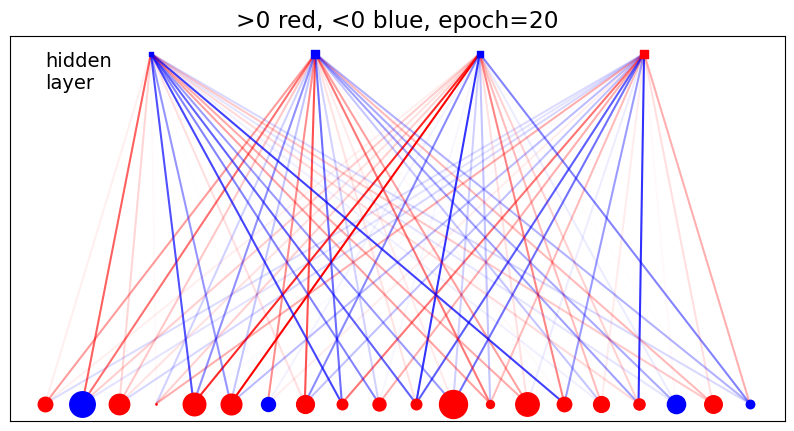

l_rate =  0.8333333333333337
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.07745527  0.82760381  0.21396218  0.02790588 -0.91476985 -0.55052335
  0.0153238   0.16822583 -0.967152   -0.64123243 -0.81634404 -0.52113696
  0.48789125  0.43873148 -0.98853978 -0.07634236  0.1955161  -0.13574736
  0.28236907 -0.19771559]
EVALUATED ENERGIES =  [0.30530474 0.32275195 0.         0.02379162] 

PROBABILITY :  [0.21436797 0.21066029 0.29090559 0.28406616] 

CUMULATIVE PROBABILITY :  [0.21436797 0.42502826 0.71593384 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.07803622  0.82814467  0.21270582  0.02826043 -0.91596693 -0.55164745
  0.01621788  0.1695327  -0.96754152 -0.64159001 -0.81555107 -0.52091443
  0.48878567  0.44021481 -0.98994691 -0.07748248  0.1947426  -0.13566255
  0.28216795 -0.19645496]
EVALUATED ENERGIES =  [0.30197926 0.         0.         1.05409019] 

PROBABILITY :  [0.23943856 0.32384859 0.32384859 0.11286427] 

CUMULATIVE PROBABILITY :  [0.2

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.23478202  0.96128214  0.09235112  0.00347366 -1.11505406 -0.72835095
  0.1967079   0.42818788 -0.99388052 -0.62701816 -0.72379375 -0.44824128
  0.70464999  0.72703782 -1.22781956 -0.29636403  0.14393275  0.00835433
  0.24081251 -0.06828645]
EVALUATED ENERGIES =  [ 0.         -1.25137475  0.29621577 -0.19563451] 

PROBABILITY :  [0.15492217 0.5414754  0.1152043  0.18839812] 

CUMULATIVE PROBABILITY :  [0.15492217 0.69639757 0.81160188 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.23594903  0.96239559  0.09156099  0.00333912 -1.11669366 -0.72922674
  0.19810748  0.42995304 -0.99449801 -0.62653355 -0.72344519 -0.44712949
  0.70638991  0.72894927 -1.22959094 -0.297777    0.14337737  0.0094464
  0.24034454 -0.06669381]
EVALUATED ENERGIES =  [ 0.         -0.42445974  1.01174755 -1.34079105] 

PROBABILITY :  [0.14893335 0.22768398 0.05414964 0.56923304] 

CUMULATIVE PROBABILITY :  [0.14893335 0.37661732 0.4

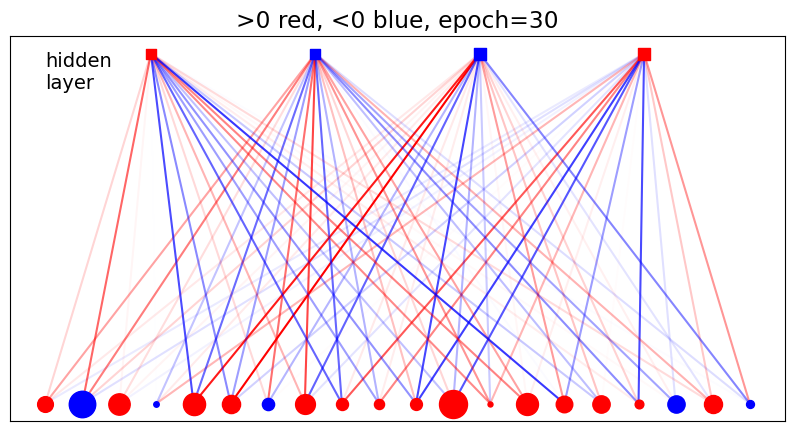

l_rate =  0.7692307692307697
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.27182453  0.99696056  0.06777217 -0.00338004 -1.1674452  -0.76803073
  0.24509358  0.48974983 -0.99756212 -0.63160154 -0.70948835 -0.41208331
  0.76662025  0.8042391  -1.29548539 -0.35973136  0.11896339  0.04126756
  0.23660171 -0.02120053]
EVALUATED ENERGIES =  [ 0.40038803 -0.08262964  0.61394985  0.        ] 

PROBABILITY :  [0.20320807 0.32939185 0.16413161 0.30326847] 

CUMULATIVE PROBABILITY :  [0.20320807 0.53259992 0.69673153 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.27319769  0.9977164   0.06655931 -0.00369393 -1.16904886 -0.76965363
  0.24655887  0.49148225 -0.9973467  -0.63158876 -0.71003167 -0.41119783
  0.76790607  0.8059869  -1.29726547 -0.36112632  0.11817769  0.04239352
  0.23614136 -0.02022939]
EVALUATED ENERGIES =  [ 1.61626359  0.26077118 -0.39122865  0.18244509] 

PROBABILITY :  [0.06054009 0.23481504 0.45069822 0.25394666] 

CUMULATIVE PROBABILITY

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.46471561  1.15424373 -0.09849548 -0.05631992 -1.34759692 -0.96256567
  0.42962348  0.73536066 -1.05429213 -0.59689396 -0.66392377 -0.28828668
  1.0085027   1.11636581 -1.57671165 -0.63377024  0.03592375  0.21104184
  0.21792273  0.08821743]
EVALUATED ENERGIES =  [-1.02238855  0.10913754  0.          1.63622825] 

PROBABILITY :  [0.57067191 0.18406489 0.20529047 0.03997274] 

CUMULATIVE PROBABILITY :  [0.57067191 0.75473679 0.96002726 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.46552598  1.15572737 -0.09963294 -0.05683628 -1.34825163 -0.96337122
  0.43025434  0.73661506 -1.05510383 -0.59657076 -0.6637602  -0.28717587
  1.01018319  1.1181422  -1.57839344 -0.63556633  0.03537317  0.21207766
  0.21759158  0.08908718]
EVALUATED ENERGIES =  [-0.55062225  0.65133047 -0.88177813  1.60474455] 

PROBABILITY :  [0.35599298 0.10701385 0.49574758 0.04124559] 

CUMULATIVE PROBABILITY :  [0.35599298 0.46300683 0.

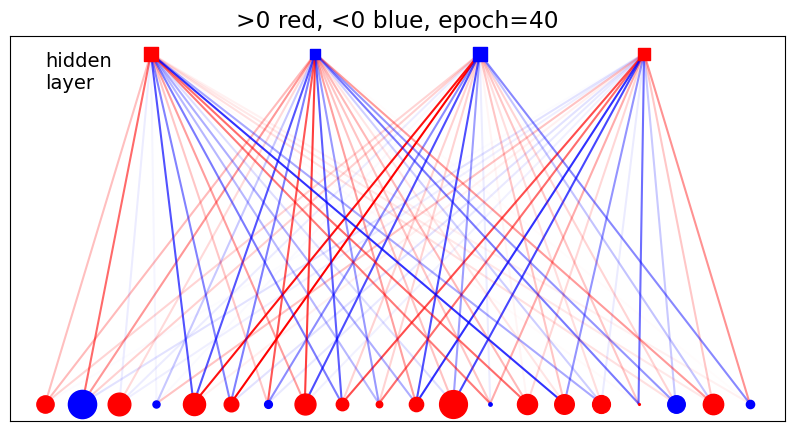

l_rate =  0.7142857142857149
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.51073091  1.19603844 -0.15228015 -0.07784889 -1.39177912 -1.00210298
  0.45956078  0.78955519 -1.06422162 -0.58137145 -0.6607106  -0.27565079
  1.06702712  1.18353457 -1.64886026 -0.69905551  0.03373904  0.24545508
  0.18231341  0.11619112]
EVALUATED ENERGIES =  [ 0.07120166  1.01340611 -1.80205975  1.52963157] 

PROBABILITY :  [0.12297308 0.04793093 0.8004923  0.02860369] 

CUMULATIVE PROBABILITY :  [0.12297308 0.17090402 0.97139631 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.51167788  1.19688106 -0.15345444 -0.07863364 -1.39312347 -1.00318766
  0.4600686   0.79099924 -1.06412646 -0.58142947 -0.660918   -0.27544007
  1.06841633  1.18508068 -1.65087599 -0.70060373  0.03338252  0.24652521
  0.18122172  0.11663626]
EVALUATED ENERGIES =  [ 0.43321193  0.         -1.10055915  4.49895496] 

PROBABILITY :  [0.13898582 0.21434436 0.64428618 0.00238364] 

CUMULATIVE PROBABILITY

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.66208214  1.38507596 -0.44241596 -0.15142848 -1.47570781 -0.99253498
  0.36480818  0.91698205 -1.06890188 -0.47271309 -0.81467071 -0.23949355
  1.25228586  1.46609208 -1.96371875 -0.95752559 -0.00802441  0.46240801
 -0.04716097  0.17337205]
EVALUATED ENERGIES =  [ 0.18487135  0.         -0.4901555   1.44606454] 

PROBABILITY :  [0.22469562 0.27032313 0.44132144 0.06365981] 

CUMULATIVE PROBABILITY :  [0.22469562 0.49501874 0.93634019 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.66323519  1.38694511 -0.44451292 -0.1529711  -1.47494855 -0.99110432
  0.36247084  0.9169588  -1.06825543 -0.47110247 -0.81686602 -0.23995309
  1.25335891  1.4680723  -1.96614022 -0.95910982 -0.00763018  0.46433445
 -0.04959763  0.17316841]
EVALUATED ENERGIES =  [-0.04409577  0.         -1.69107421 -1.54332456] 

PROBABILITY :  [0.08601139 0.08230106 0.4465084  0.38517915] 

CUMULATIVE PROBABILITY :  [0.08601139 0.16831245 0.

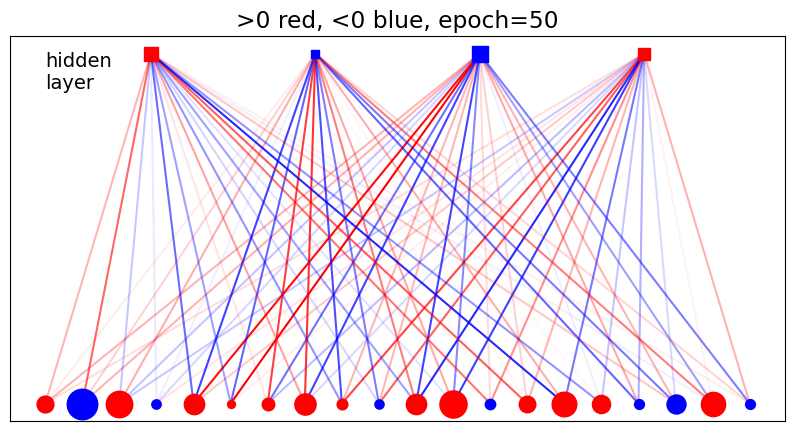

l_rate =  0.6666666666666671
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.71608395  1.46436017 -0.53587034 -0.20174356 -1.42697728 -0.90673839
  0.26413764  0.89545609 -1.01972379 -0.39254833 -0.91021709 -0.27238715
  1.31311854  1.54624472 -2.05638442 -1.03202615  0.02414815  0.55022533
 -0.14851343  0.15529177]
EVALUATED ENERGIES =  [ 3.79012436  1.41752442  0.         -1.59122614] 

PROBABILITY :  [0.00365895 0.03924308 0.16195194 0.79514603] 

CUMULATIVE PROBABILITY :  [0.00365895 0.04290203 0.20485397 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.71755284  1.46650595 -0.5384879  -0.20333599 -1.42545198 -0.90409043
  0.26122288  0.89439158 -1.01844416 -0.39025407 -0.91320628 -0.27326607
  1.31515753  1.54811363 -2.05899181 -1.03405627  0.02511678  0.55240873
 -0.15111186  0.15444221]
EVALUATED ENERGIES =  [ 0.          1.42190238 -2.75021577 -1.11756154] 

PROBABILITY :  [0.05013875 0.01209621 0.78447132 0.15329372] 

CUMULATIVE PROBABILITY

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 1.18908118  1.91958998 -0.95480158 -0.57790633 -0.87811959 -0.35475181
 -0.23013255  0.49576097 -0.52116371  0.12020501 -1.35310393 -0.64580036
  1.77221289  1.97924153 -2.48547636 -1.43871726  0.47539908  1.06233512
 -0.57929866 -0.20487542]
EVALUATED ENERGIES =  [ 3.0030162   0.         -1.55300182 -1.64651673] 

PROBABILITY :  [0.00452722 0.09120638 0.431008   0.4732584 ] 

CUMULATIVE PROBABILITY :  [0.00452722 0.0957336  0.5267416  1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 1.19273734  1.92283337 -0.9572179  -0.58097784 -0.87414528 -0.35127674
 -0.23305483  0.49247625 -0.51722763  0.12362069 -1.35575469 -0.64889757
  1.77576748  1.98231205 -2.48817906 -1.4416305   0.47904308  1.06580384
 -0.5818761  -0.20783385]
EVALUATED ENERGIES =  [-5.29768132 -5.40247256  0.          4.93688323] 

PROBABILITY :  [4.72697502e-01 5.24920534e-01 2.36499126e-03 1.69733823e-05] 

CUMULATIVE PROBABILITY :  [0.472697

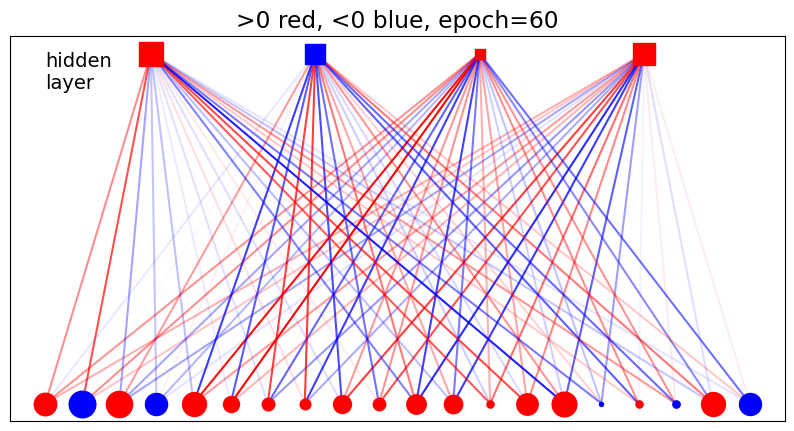

l_rate =  0.6250000000000006
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 1.32970128  2.04006793 -1.05112445 -0.69348562 -0.73214512 -0.22086907
 -0.34587786  0.37149372 -0.37405833  0.24670192 -1.4537273  -0.76431901
  1.90968037  2.09978505 -2.59774668 -1.55237818  0.61846258  1.1875731
 -0.68105918 -0.31560317]
EVALUATED ENERGIES =  [ 1.16106508  0.          0.03313384 -1.66154744] 

PROBABILITY :  [0.04148804 0.13248513 0.12816731 0.69785952] 

CUMULATIVE PROBABILITY :  [0.04148804 0.17397317 0.30214048 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 1.33300891  2.04305313 -1.05354874 -0.69623546 -0.72873336 -0.21768025
 -0.34867232  0.36855889 -0.37065372  0.24979613 -1.4561682  -0.76717187
  1.9130129   2.10263494 -2.60047338 -1.55509098  0.6219102   1.19058478
 -0.68353882 -0.31835612]
EVALUATED ENERGIES =  [ 0.          4.25624858 -1.5036658  -1.56969086] 

PROBABILITY :  [0.09692284 0.00137392 0.43597328 0.46572997] 

CUMULATIVE PROBABILITY 

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 1.74729019  2.44046013 -1.39672555 -1.04404752 -0.28133511  0.19763898
 -0.75235899 -0.01771183  0.05335563  0.65632779 -1.81499384 -1.11748095
  2.35102033  2.50135968 -3.00409703 -1.93014656  1.05027705  1.59273484
 -1.03242061 -0.67773918]
EVALUATED ENERGIES =  [ 2.12881665  1.54308586 -3.32908993  0.        ] 

PROBABILITY :  [0.00406823 0.00730778 0.95443084 0.03419315] 

CUMULATIVE PROBABILITY :  [0.00406823 0.01137601 0.96580685 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 1.74933476  2.44246523 -1.3985917  -1.04577589 -0.27916309  0.19981218
 -0.75451732 -0.01971507  0.0553511   0.65841667 -1.81683382 -1.11927212
  2.35325848  2.50348265 -3.00635021 -1.9321632   1.05234774  1.59474928
 -1.03433767 -0.67942921]
EVALUATED ENERGIES =  [ 0.07655992  0.         -1.45211273 -0.32797643] 

PROBABILITY :  [0.12209676 0.13181162 0.56311649 0.18297513] 

CUMULATIVE PROBABILITY :  [0.12209676 0.25390838 0.

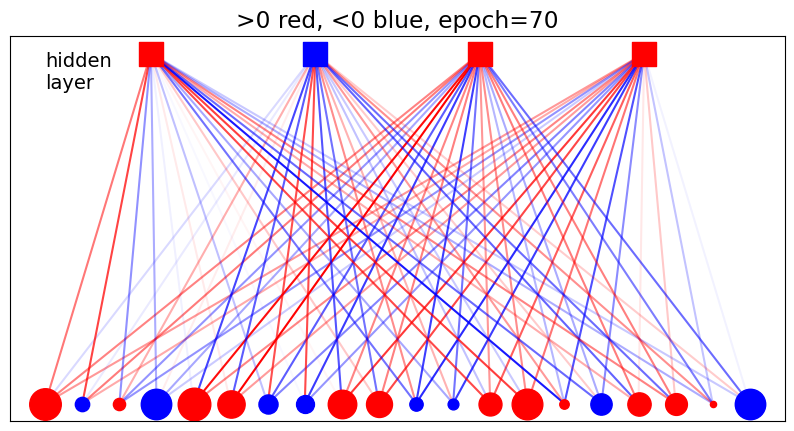

l_rate =  0.5882352941176475
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 1.82876802  2.51918805 -1.47349093 -1.11180885 -0.19675316  0.2816976
 -0.83806109 -0.09353322  0.13324184  0.73750415 -1.89379722 -1.18382845
  2.43621635  2.58338196 -3.09133283 -2.00581589  1.13040823  1.67115771
 -1.10781545 -0.74194456]
EVALUATED ENERGIES =  [ 0.91121638  1.2373801  -1.47716559 -1.68309204] 

PROBABILITY :  [0.03845435 0.027752   0.41899279 0.51480086] 

CUMULATIVE PROBABILITY :  [0.03845435 0.06620635 0.48519914 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 1.83074475  2.52102067 -1.47543572 -1.11326483 -0.19469939  0.2836983
 -0.84012747 -0.09536877  0.13510469  0.73947958 -1.8956331  -1.1854523
  2.43831993  2.58533069 -3.0934492  -2.00766958  1.13224215  1.67307856
 -1.10962861 -0.74341276]
EVALUATED ENERGIES =  [ 2.30766418  0.         -0.49896532 -2.9750764 ] 

PROBABILITY :  [0.00445407 0.04476751 0.07373281 0.87704561] 

CUMULATIVE PROBABILITY : 

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 2.09129863  2.77980104 -1.73520074 -1.32775551  0.08811878  0.56015076
 -1.13476915 -0.34818339  0.39300227  1.00233972 -2.15789134 -1.3986765
  2.72389588  2.86084168 -3.39875131 -2.26180169  1.38873432  1.93812671
 -1.37103953 -0.95417911]
EVALUATED ENERGIES =  [ 2.19711653  0.         -1.33260121 -1.3519349 ] 

PROBABILITY :  [0.01267529 0.11406526 0.43240903 0.44085042] 

CUMULATIVE PROBABILITY :  [0.01267529 0.12674055 0.55914958 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 2.0926729   2.78125005 -1.73665713 -1.32896301  0.08968739  0.56166561
 -1.13649909 -0.34952899  0.39445669  1.00374313 -2.1594298  -1.39984714
  2.72548761  2.86236536 -3.40044193 -2.26328864  1.39011275  1.93949903
 -1.37242009 -0.95529769]
EVALUATED ENERGIES =  [ 2.19738025  0.         -1.28643072 -0.56196404] 

PROBABILITY :  [0.01713075 0.15420078 0.55818267 0.2704858 ] 

CUMULATIVE PROBABILITY :  [0.01713075 0.17133154 0.7

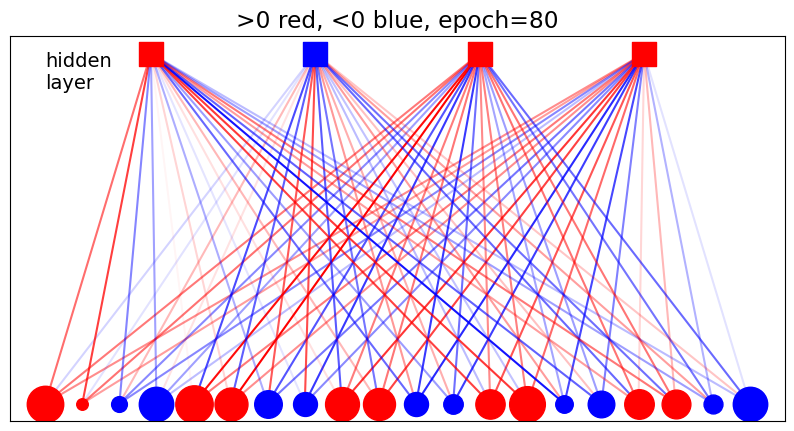

l_rate =  0.555555555555556
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 2.14373069  2.83519897 -1.79146555 -1.37295197  0.14797354  0.61964351
 -1.20084248 -0.4019857   0.44726434  1.05833653 -2.21665042 -1.4455494
  2.78570638  2.92107869 -3.46645349 -2.31977488  1.44089814  1.99376294
 -1.42715849 -0.99838213]
EVALUATED ENERGIES =  [ 0.16877426  1.65646739 -1.25053024 -0.49163701] 

PROBABILITY :  [0.13706656 0.0309624  0.56666662 0.26530442] 

CUMULATIVE PROBABILITY :  [0.13706656 0.16802896 0.73469558 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 2.1449489   2.8365944  -1.79281695 -1.37411864  0.14937755  0.62113455
 -1.2024221  -0.40334875  0.44843024  1.05970139 -2.21803503 -1.44652224
  2.7872097   2.92252286 -3.46809289 -2.32118918  1.44216849  1.99507817
 -1.42847947 -0.99950124]
EVALUATED ENERGIES =  [-0.37340534  1.66906282  0.         -1.31457691] 

PROBABILITY :  [0.22825439 0.02960646 0.15712716 0.58501199] 

CUMULATIVE PROBABILITY :

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 2.33071292  3.03163825 -1.99484061 -1.54525625  0.36451899  0.83022812
 -1.43335208 -0.6084546   0.63464958  1.25278955 -2.41554556 -1.61787879
  3.0034809   3.13409983 -3.70721092 -2.52712841  1.6240255   2.19174239
 -1.62754311 -1.16640368]
EVALUATED ENERGIES =  [ 0.          1.48685471 -0.491813   -1.18729384] 

PROBABILITY :  [0.16287815 0.03682392 0.26635111 0.53394682] 

CUMULATIVE PROBABILITY :  [0.16287815 0.19970208 0.46605318 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 2.33169868  3.03276539 -1.99592997 -1.54636523  0.36571331  0.83142977
 -1.43471971 -0.60960675  0.63568339  1.2538803  -2.41663568 -1.61897736
  3.00475409  3.13532546 -3.70861545 -2.52841358  1.62501157  2.19281281
 -1.62864556 -1.16735827]
EVALUATED ENERGIES =  [ 0.204043    1.48591035  0.         -1.42280066] 

PROBABILITY :  [0.1317235  0.03655572 0.16153923 0.67018156] 

CUMULATIVE PROBABILITY :  [0.1317235  0.16827921 0.

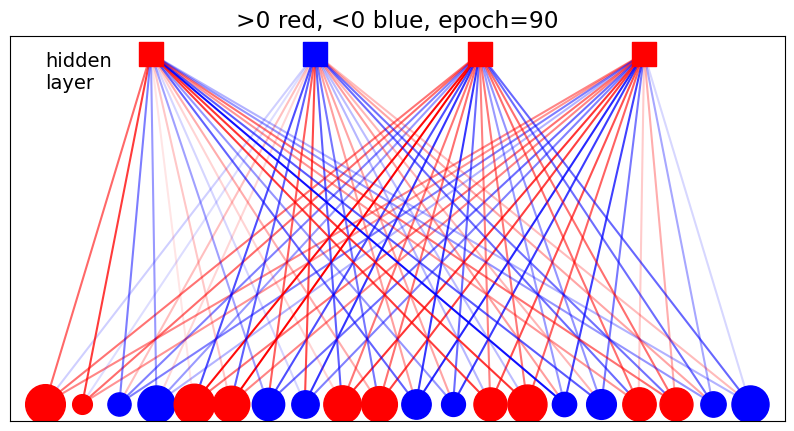

l_rate =  0.5263157894736847
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 2.37042026  3.07496257 -2.03885911 -1.59031505  0.41179409  0.8769864
 -1.48601124 -0.65645232  0.67588962  1.29393481 -2.45869694 -1.66130259
  3.05238945  3.18163537 -3.76138251 -2.57751144  1.66297272  2.23342018
 -1.67290426 -1.20364353]
EVALUATED ENERGIES =  [ 0.4701245   0.44573196 -1.11508145 -0.00169572] 

PROBABILITY :  [0.11753784 0.12044015 0.57361952 0.18840249] 

CUMULATIVE PROBABILITY :  [0.11753784 0.23797799 0.81159751 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 2.37139993  3.07601073 -2.03990238 -1.5913579   0.4129222   0.87811883
 -1.48727478 -0.65753997  0.67689623  1.29498942 -2.45975885 -1.66236009
  3.05356752  3.18283433 -3.76269557 -2.57873872  1.6640129   2.23438949
 -1.67397717 -1.2045653 ]
EVALUATED ENERGIES =  [ 0.22041946  1.45283243 -1.91592649  0.88500812] 

PROBABILITY :  [0.09732824 0.02837976 0.82421807 0.05007393] 

CUMULATIVE PROBABILITY 

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 2.51544221  3.22520472 -2.20134419 -1.744895    0.58520019  1.05352657
 -1.67940223 -0.84382569  0.81903024  1.44609521 -2.61131325 -1.82429737
  3.23109451  3.36026759 -3.96264916 -2.76738233  1.80511243  2.38555728
 -1.83080289 -1.36032277]
EVALUATED ENERGIES =  [-0.74480182  1.09109819  0.         -1.00755919] 

PROBABILITY :  [0.34073763 0.0543374  0.1617919  0.44313308] 

CUMULATIVE PROBABILITY :  [0.34073763 0.39507502 0.55686692 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 2.51631784  3.22604952 -2.20225063 -1.74593904  0.58625238  1.05457654
 -1.68057338 -0.84499759  0.81990649  1.44697835 -2.61217211 -1.82542997
  3.23213053  3.36133146 -3.96384004 -2.76852374  1.80601727  2.3863709
 -1.83174876 -1.36127797]
EVALUATED ENERGIES =  [ 0.          2.23920022 -1.06599935 -0.99445979] 

PROBABILITY :  [0.14895256 0.01586995 0.43251943 0.40265805] 

CUMULATIVE PROBABILITY :  [0.14895256 0.16482252 0.5

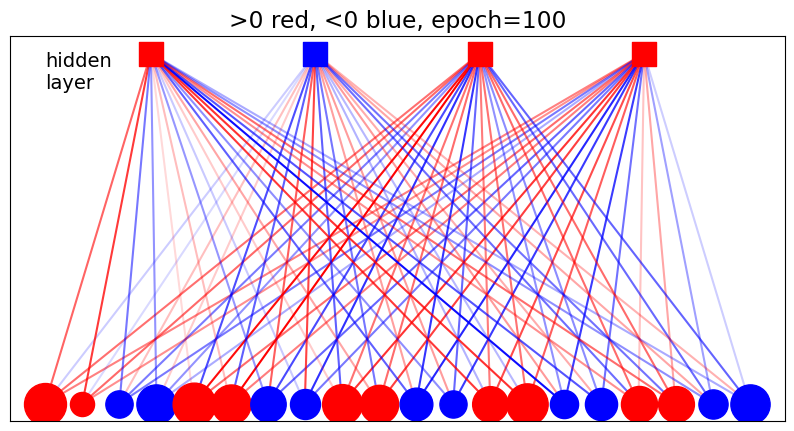

l_rate =  0.5000000000000009


In [9]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# initialize Adam 
beta1=0.9
beta2=0.999
epsilon=1e-8
m_dw, v_dw = 0, 0
m_db, v_db = 0, 0
m_da, v_da = 0, 0
t=1

# minibatch
mini, m = 500, 0
steps=10
# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf = h
        vf=v[k]
        for i in range(steps):
            vf,_ = activate_back(v[k],hf,w,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       #removed l_rate_m (has to be used after)
            db = l_rate_m*(h_data - h_model)
            
            ##********update***********##
            m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
            m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
            m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

            ## rms beta 2
            v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
            v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
            v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

            ## bias correction
            m_dw_corr = m_dw/(1-beta1**t)
            m_db_corr = m_db/(1-beta1**t)
            m_da_corr = m_da/(1-beta1**t)

            v_dw_corr = v_dw/(1-beta2**t)
            v_db_corr = v_db/(1-beta2**t)
            v_da_corr = v_da/(1-beta2**t)
            
            
            if epoch%10==9 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                print('vh_data \n', vh_data, '\n')
                print('vh_model \n',vh_model)
                
            ## update weights and biases
            w = w - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
            b = b - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
            a = a - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
            m=0
            t=t+1 #update the time
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)


# Training with RMSprop

In [ ]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1e-3

# initialize RMSprop 
beta=0.9
epsilon=1e-8
v_dw, v_db, v_da = 0, 0, 0

# minibatch
mini, m = 5000, 0
steps=3
# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf = h
        vf=v[k]
        for i in range(steps):
            vf,_ = activate_back(vf,hf,w.T,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       #removed l_rate_m (has to be used after)
            db = l_rate_m*(h_data - h_model)

            ## rms prop
            v_dw = beta*v_dw + (1-beta)*((vh_data - vh_model)**2)
            v_db = beta*v_db + (1-beta)*((h_data - h_model)**2)
            v_da = beta*v_da + (1-beta)*((v_data - v_model)**2)

            if epoch%10==9 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                print('vh_data \n', vh_data, '\n')
                print('vh_model \n',vh_model)
                
            ## update weights and biases
            w = w - l_rate*((vh_data - vh_model)/(np.sqrt(v_dw+epsilon)))
            b = b - l_rate*((h_data - h_model)/(np.sqrt(v_db+epsilon)))
            a = a - l_rate*((v_data - v_model)/(np.sqrt(v_da+epsilon)))
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    #l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)


# Optional 5. plot the weights 


Plot the weights wiμ of each hidden unit μ
in an A×G table, with a color map preserving the
rule that red means positive and blue
means negative weight

In [10]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)


w0= [[-8.35715520e-02  1.95527799e-01 -2.12059967e-01 -2.26875947e-01]
 [ 8.02526558e-01  5.68855549e-01  3.79294819e-02  1.15022385e-01]
 [ 3.13952149e-01  5.08854850e-01  4.11183333e-01 -5.29180052e-01]
 [ 1.12264864e-01  9.34532915e-02  5.52325985e-01  3.61883263e-01]
 [-8.17165010e-01 -1.51804080e-01  6.81376729e-01 -1.79045345e-01]
 [-2.20348522e-01  1.94728315e-01  1.32637580e+00 -4.16914391e-01]
 [-2.35594905e-01  5.06722986e-02  1.23541469e-01  2.13829051e-01]
 [ 3.83866794e-04  5.48608051e-01 -2.91303112e-01 -3.39317011e-01]
 [-9.67643021e-01 -7.59652411e-01 -3.51402736e-01  2.28678358e-01]
 [-5.16815592e-01  4.89192188e-02 -4.34177139e-01  1.35898800e-01]
 [-9.63228695e-01 -8.14630704e-02 -6.29517038e-01 -3.96301277e-01]
 [-5.33592866e-01  1.16901795e-01  1.54311367e-01 -3.07772889e-01]
 [ 1.35246800e-01  5.51029952e-01  2.85270388e-02  1.00704284e-01]
 [-4.84247836e-03  4.10212614e-01  5.41824932e-01 -3.75286959e-01]
 [-6.32420055e-01  9.05682448e-03  3.09600458e-01 -2.69657

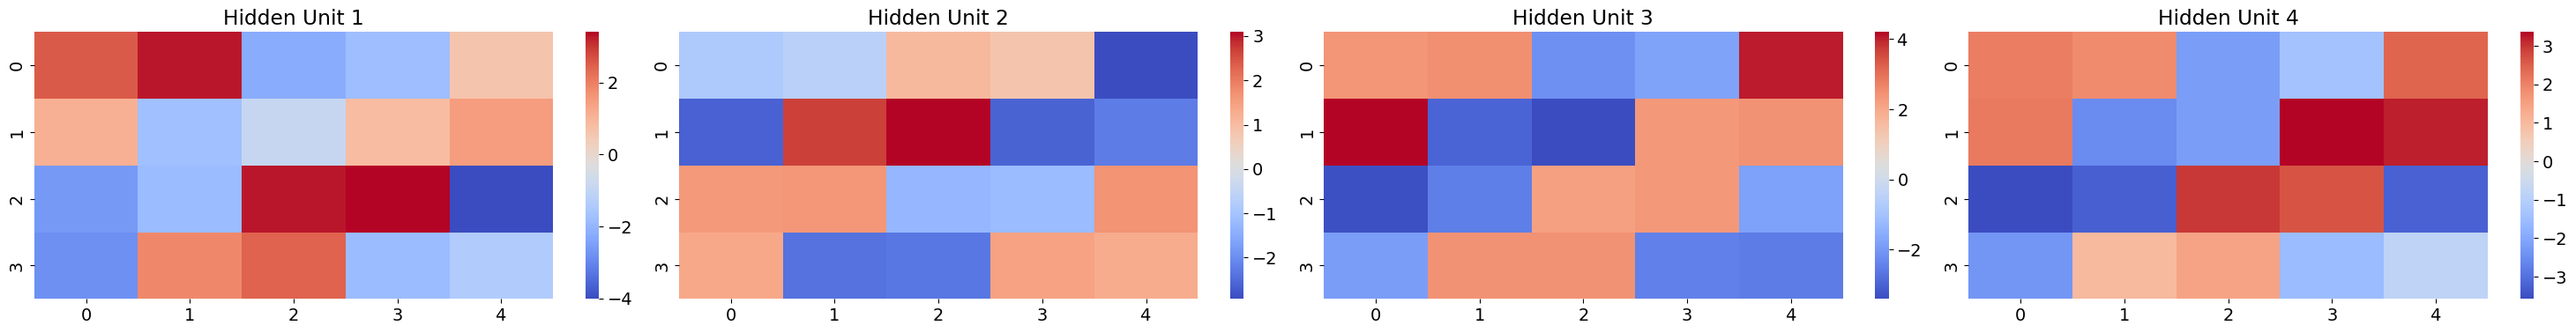

In [11]:
w1=[w[:,i].reshape(4,5) for i in range(M)]
import seaborn as sns

fig, axs = plt.subplots(ncols=M, figsize=(5*6,4))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs[i])
    axs[i].set_title(f'Hidden Unit {i+1}')
    plt.tight_layout()
plt.show()

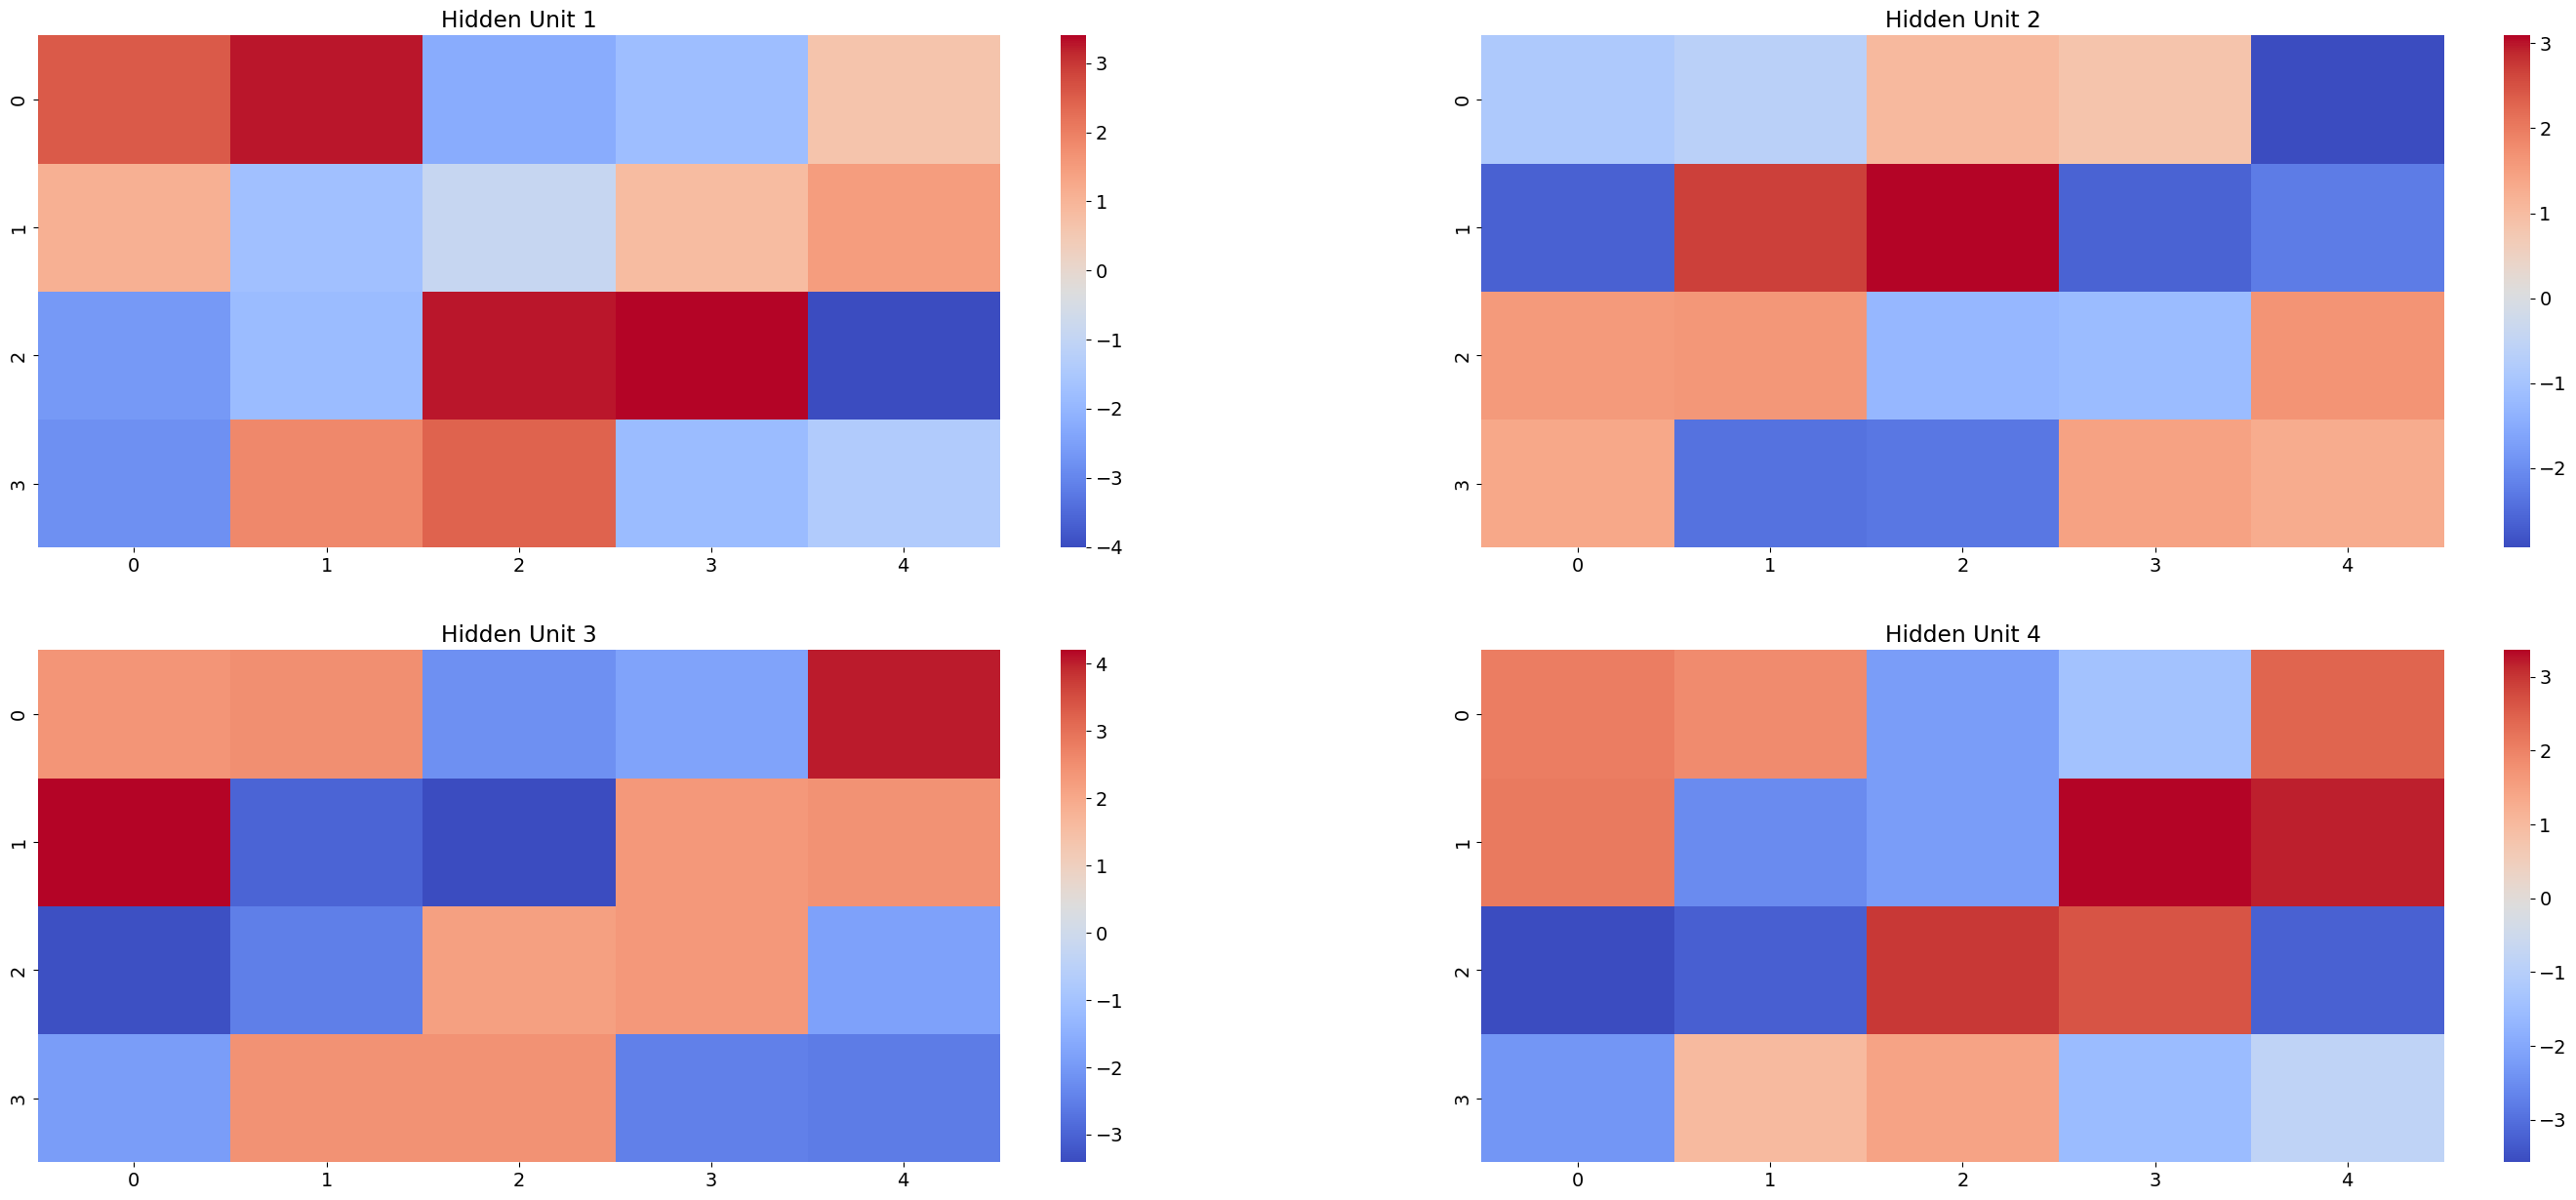

In [12]:
fig, axs = plt.subplots(nrows=M-2,ncols=M-2,figsize=(35,15))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs.flat[i])
    axs.flat[i].set_title(f'Hidden Unit {i+1}')
plt.show()

